In [9]:
%load_ext autoreload 
%autoreload 2

In [10]:
import pandas as pd
import re

In [11]:
def read_and_filter(filename):
    with open(filename, 'rt') as f:
        text = f.read()

    text = re.sub('\n\n+', '\n', text)
    text = re.sub('(?<=\w)\s*\n(?=\w)', ' ', text)
    text = text.replace('  ', ' ')
    text = text.replace('', '')
    return text

In [12]:
text = read_and_filter('../data/external/constitucion_chile_2022/borrador.txt')
print(text[0:2500])

 
• Este documento es un consolidado que reúne las normas aprobadas por el Pleno de la Convención Constitucional, ordenadas por comisión. La relación de números de los artículos obedece a lo dispuesto en los respectivos informes y no es el orden definitivo, ya que ese proceso deberá ser realizado por la Comisión de Armonización 
(Actualizado el 14.05.22). 
 
CONSOLIDADO NORMAS APROBADAS PARA LA PROPUESTA CONSTITUCIONAL POR EL PLENO DE LA CONVENCIÓN CAPÍTULO (COM 1) 
DE LA DEMOCRACIA 1.- Artículo 2°.- Democracia paritaria. El Estado reconoce y promueve una sociedad en la que mujeres, hombres, diversidades y disidencias sexogenéricas participen en condiciones de igualdad sustantiva, reconociendo que su representación efectiva en el conjunto del proceso democrático es un principio y condición mínima para el ejercicio pleno y sustantivo de la democracia y la ciudadanía. 
Todos los órganos colegiados del Estado, los órganos autónomos constitucionales y los órganos superiores y directivos de

In [13]:
prev = read_and_filter('../data/external/constitucion_chile_2022/actual.txt')
print(prev[0:2500])

   FIJA EL TEXTO REFUNDIDO, COORDINADO Y SISTEMATIZADO DE LA CONSTITUCIÓN POLÍTICA DE LA REPÚBLICA DE CHILE
     Núm. 100.- Santiago, 17 de septiembre de 2005.-
  Visto: En uso de las facultades que me confiere el artículo 2° de la Ley Nº 20.050, y teniendo presente lo dispuesto en el artículo 32 N°8 de la Constitución Política de 1980,
     Decreto:
     Fíjase el siguiente texto refundido, coordinado y sistematizado de la Constitución Política de la República:
  Capítulo I
  BASES DE LA INSTITUCIONALIDAD
  Artículo 1°.- Las personas nacen libres e iguales en dignidad y derechos.
  La familia es el núcleo fundamental de la sociedad.
  El Estado reconoce y ampara a los grupos intermedios a través de los cuales se organiza y estructura la sociedad y les garantiza la adecuada autonomía para cumplir sus propios fines específicos.
  El Estado está al servicio de la persona humana y su finalidad es promover el bien común, para lo cual debe contribuir a crear las condiciones sociales que per

In [14]:
len(text) / len(prev) * 100

109.31976379771055

In [15]:
from gensim.utils import tokenize
from cytoolz import frequencies

prev_tokens = frequencies(tokenize(prev.replace('mente', ''), lowercase=True, deacc=False))
prev_tokens

{'fija': 33,
 'el': 1585,
 'texto': 72,
 'refundido': 53,
 'coordinado': 52,
 'y': 1250,
 'sistematizado': 52,
 'de': 3791,
 'la': 2265,
 'constitución': 123,
 'política': 18,
 'república': 200,
 'chile': 22,
 'núm': 1,
 'santiago': 3,
 'septiembre': 3,
 'visto': 1,
 'en': 1425,
 'uso': 13,
 'las': 863,
 'facultades': 10,
 'que': 1165,
 'me': 1,
 'confiere': 4,
 'artículo': 343,
 'ley': 462,
 'nº': 106,
 'teniendo': 1,
 'presente': 43,
 'lo': 223,
 'dispuesto': 66,
 'n': 30,
 'decreto': 95,
 'fíjase': 1,
 'siguiente': 32,
 'capítulo': 22,
 'i': 8,
 'bases': 8,
 'institucionalidad': 2,
 'personas': 66,
 'nacen': 1,
 'libres': 1,
 'e': 50,
 'iguales': 4,
 'dignidad': 2,
 'derechos': 33,
 'familia': 3,
 'es': 25,
 'núcleo': 1,
 'fundamental': 2,
 'sociedad': 12,
 'estado': 129,
 'reconoce': 4,
 'ampara': 1,
 'a': 996,
 'los': 1092,
 'grupos': 7,
 'intermedios': 4,
 'través': 17,
 'cuales': 14,
 'se': 531,
 'organiza': 1,
 'estructura': 3,
 'les': 24,
 'garantiza': 3,
 'adecuada': 3,
 'aut

In [16]:
next_tokens = frequencies(tokenize(text.replace('mente', ''), lowercase=True, deacc=False))
next_tokens

{'este': 75,
 'documento': 3,
 'es': 106,
 'un': 217,
 'consolidado': 2,
 'que': 881,
 'reúne': 1,
 'las': 1189,
 'normas': 26,
 'aprobadas': 7,
 'por': 513,
 'el': 1387,
 'pleno': 43,
 'de': 3751,
 'la': 2806,
 'convención': 3,
 'constitucional': 61,
 'ordenadas': 1,
 'comisión': 22,
 'relación': 14,
 'números': 2,
 'los': 1112,
 'artículos': 1,
 'obedece': 1,
 'a': 969,
 'lo': 129,
 'dispuesto': 25,
 'en': 1152,
 'respectivos': 8,
 'informes': 4,
 'y': 2416,
 'no': 192,
 'orden': 12,
 'definitivo': 2,
 'ya': 7,
 'ese': 8,
 'proceso': 26,
 'deberá': 119,
 'ser': 128,
 'realizado': 3,
 'armonización': 1,
 'actualizado': 1,
 'para': 347,
 'propuesta': 17,
 'capítulo': 20,
 'com': 8,
 'democracia': 25,
 'artículo': 538,
 'paritaria': 9,
 'estado': 396,
 'reconoce': 36,
 'promueve': 8,
 'una': 203,
 'sociedad': 18,
 'mujeres': 12,
 'hombres': 1,
 'diversidades': 6,
 'disidencias': 7,
 'sexogenéricas': 4,
 'participen': 1,
 'condiciones': 47,
 'igualdad': 32,
 'sustantiva': 12,
 'reconocie

In [17]:
len(prev_tokens), len(next_tokens)

(4078, 4556)

In [18]:
sum(prev_tokens.values()), sum(next_tokens.values())

(46318, 48436)

In [19]:
from cytoolz import keyfilter

with open("../data/external/stopwords-es.txt", "rt") as f:
    stopwords = set(f.read().split("\n"))

stopwords.update(
    [
        "artículo",
        "capítulo",
        "n°", '°'
        "inciso",
        "dicha",
        "año",
        "refiere",
        "ley",
        "orgánica",
        "plazo",
        "siguientes",
        "siguiente", 'inciso', 'número', 'efecto', 'fecha', 'años', 'procederá', 'mayo', 'dichas', 'formas',
        "incisos", 'deberán', 'deber', 'º', 'nº', 'ámbito', 'ámbitos', 'áreas', 'velar', 'ad', 'única', 'únicas', 'único', 'útiles', 'constitución', 'constitucional', 'deberá', 'determinará',
    ]
)

filtered_prev_tokens = keyfilter(lambda x: not x.lower() in stopwords, prev_tokens)
filtered_next_tokens = keyfilter(lambda x: not x.lower() in stopwords, next_tokens)


In [20]:
freq_table = (
    pd.DataFrame(filtered_prev_tokens.items(), columns=["word", "freq_prev"])
    .set_index("word")
    .join(
        pd.DataFrame(
            filtered_next_tokens.items(), columns=["word", "freq_next"]
        ).set_index("word"),
        how="outer",
    )
    .fillna(0)
)

freq_table


freq_prev  freq_next
word                                
abandono              1.0        2.0
abarca                0.0        1.0
abastecimiento        1.0        2.0
abierta               1.0        3.0
abierto               1.0        4.0
...                   ...        ...
óptima                0.0        1.0
óptimas               0.0        1.0
órdenes               8.0        6.0
órgano               10.0       35.0
órganos              18.0       66.0

[5698 rows x 2 columns]

In [21]:
import numpy as np
from aves.features.utils import normalize_columns, normalize_rows

table_n = freq_table.sum(axis=1)
freq_table = freq_table.pipe(normalize_rows)
freq_table["tendency"] = freq_table["freq_next"] - freq_table["freq_prev"]
freq_table["n"] = table_n
freq_table.sort_values("n")
freq_table


freq_prev  freq_next  tendency     n
word                                                
abandono         0.333333   0.666667  0.333333   3.0
abarca           0.000000   1.000000  1.000000   1.0
abastecimiento   0.333333   0.666667  0.333333   3.0
abierta          0.250000   0.750000  0.500000   4.0
abierto          0.200000   0.800000  0.600000   5.0
...                   ...        ...       ...   ...
óptima           0.000000   1.000000  1.000000   1.0
óptimas          0.000000   1.000000  1.000000   1.0
órdenes          0.571429   0.428571 -0.142857  14.0
órgano           0.222222   0.777778  0.555556  45.0
órganos          0.214286   0.785714  0.571429  84.0

[5698 rows x 4 columns]

<AxesSubplot:ylabel='Frequency'>

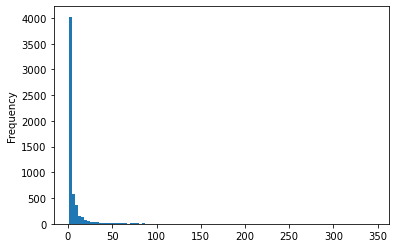

In [22]:
freq_table['n'].plot(kind='hist', bins=100)

In [23]:
freq_table.sort_values('n').tail(15)

freq_prev  freq_next  tendency      n
word                                             
funciones    0.493750   0.506250  0.012500  160.0
cargo        0.515528   0.484472 -0.031056  161.0
electoral    0.817143   0.182857 -0.634286  175.0
forma        0.477273   0.522727  0.045455  176.0
diputados    0.427778   0.572222  0.144444  180.0
congreso     0.375000   0.625000  0.250000  192.0
caso         0.651376   0.348624 -0.302752  218.0
personas     0.298643   0.701357  0.402715  221.0
nacional     0.560000   0.440000 -0.120000  225.0
regional     0.379310   0.620690  0.241379  232.0
derechos     0.136364   0.863636  0.727273  242.0
ejercicio    0.437984   0.562016  0.124031  258.0
presidente   0.649842   0.350158 -0.299685  317.0
república    0.628931   0.371069 -0.257862  318.0
derecho      0.257971   0.742029  0.484058  345.0

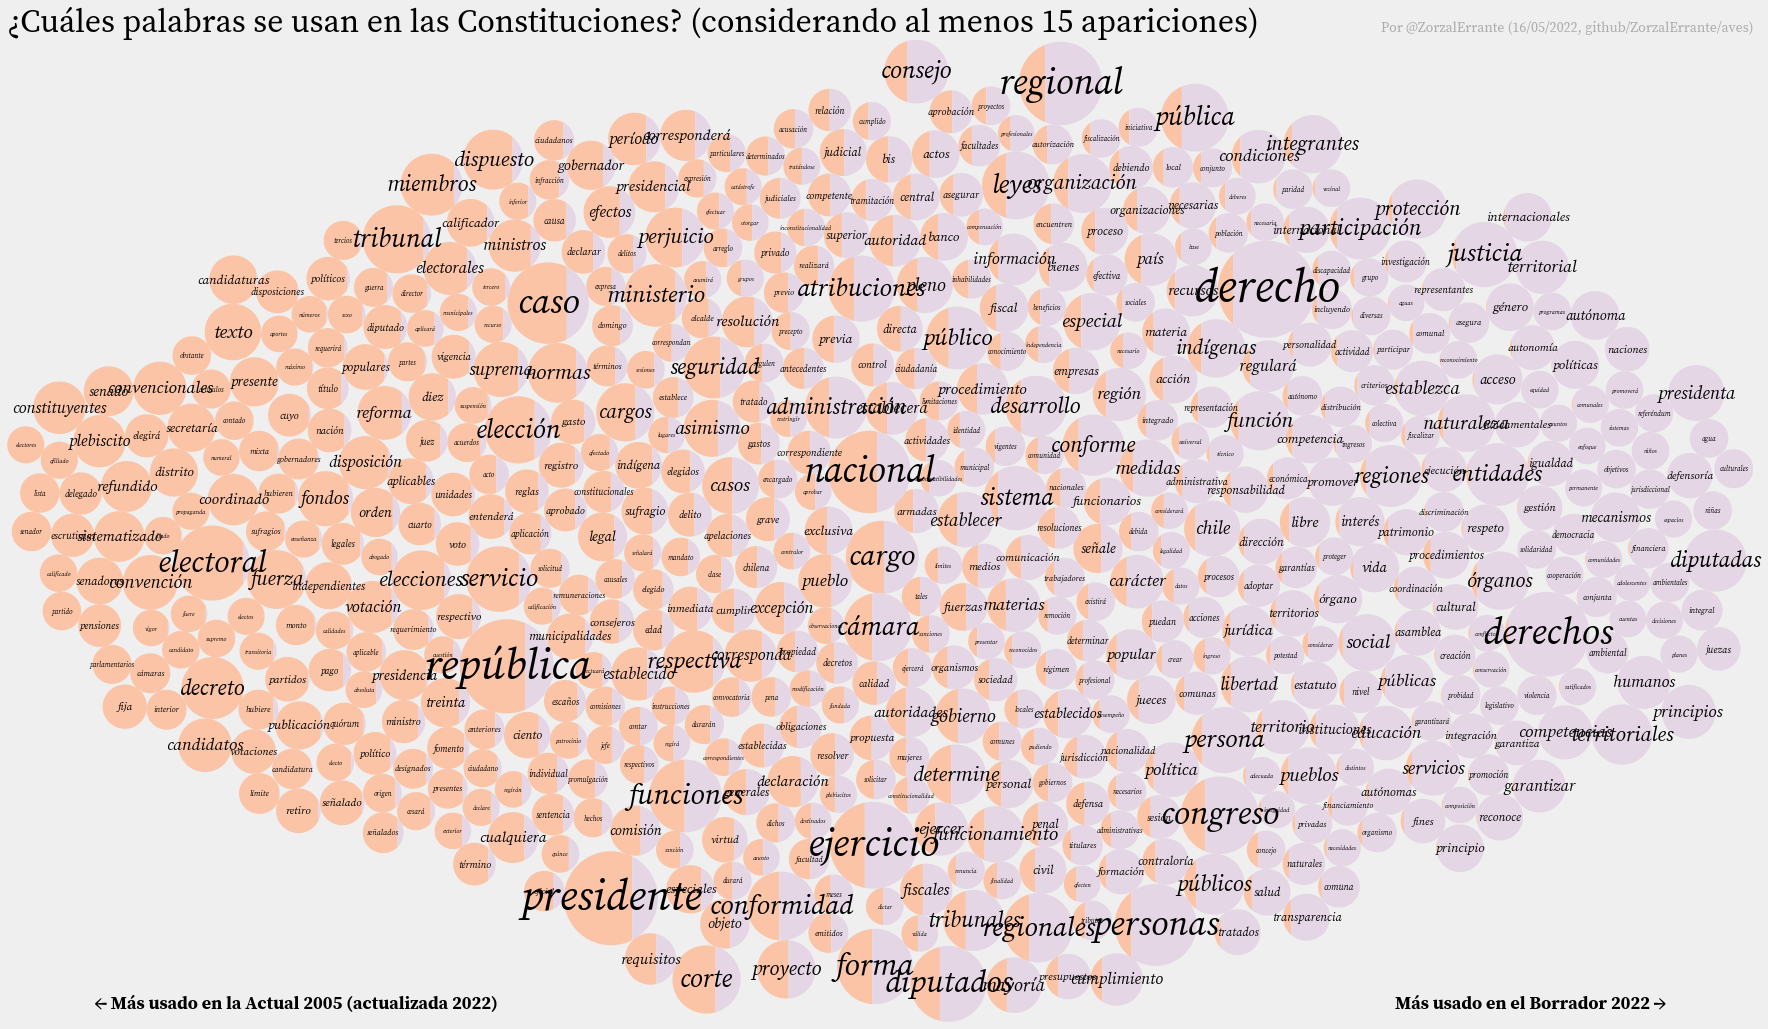

In [24]:
import matplotlib.pyplot as plt
from aves.visualization.tables import bubble_plot

fig, ax = plt.subplots(figsize=(24 * 1.2, 12 * 1.2))

left_color, right_color = ['#fbc4a6', '#e5d6e5']

bubble_plot(
    ax,
    freq_table[freq_table["n"] >= 15].reset_index().sort_values("n", ascending=False),
    "tendency",
    "n",
    label_column="word",
    palette="cool",
    dual=True,
    dual_left_color=left_color,
    dual_right_color=right_color,
    max_label_size=46,
    min_label_size=0,
    starting_y_range=3,
    margin=5,
    x_position_scaling=320,
    fontname="Source Serif Pro",
    fontstyle="italic",
)

ax.set_title(
    "¿Cuáles palabras se usan en las Constituciones? (considerando al menos 15 apariciones)",
    loc="left",
    fontname="Source Serif Pro",
    fontsize=32,
)
ax.set_title(
    "Por @ZorzalErrante (16/05/2022, github/ZorzalErrante/aves)",
    loc="right",
    fontname="Source Serif Pro",
    fontsize=14,
    color="#abacab",
)
ax.set_axis_off()

ax.annotate(
    "Más usado en el Borrador 2022 →",
    (0.95, 0.01),
    xycoords="axes fraction",
    ha="right",
    va="bottom",
    fontsize=18,
    fontname="Source Serif Pro",
    fontweight="bold",
    color="black",
)
ax.annotate(
    "← Más usado en la Actual 2005 (actualizada 2022)",
    (0.05, 0.01),
    xycoords="axes fraction",
    ha="left",
    va="bottom",
    fontsize=18,
    fontname="Source Serif Pro",
    fontweight="bold",
    color="black",
)


fig.set_facecolor("#efefef")
fig.tight_layout()
fig.savefig('bubble_cloud_constitucional.png', dpi=150, bbox_inches='tight')

In [25]:
non_freq_words = freq_table[freq_table['n'] < 15].pipe(lambda x: x.mul(x['n'], axis='index')).drop(['tendency', 'n'], axis=1)
non_freq_words

freq_prev  freq_next
word                                
abandono              1.0        2.0
abarca                0.0        1.0
abastecimiento        1.0        2.0
abierta               1.0        3.0
abierto               1.0        4.0
...                   ...        ...
ñuble                 2.0        0.0
ó                     3.0        0.0
óptima                0.0        1.0
óptimas               0.0        1.0
órdenes               8.0        6.0

[5109 rows x 2 columns]

In [26]:
from aves.visualization.text import draw_wordcloud

In [27]:
from matplotlib.font_manager import FontProperties

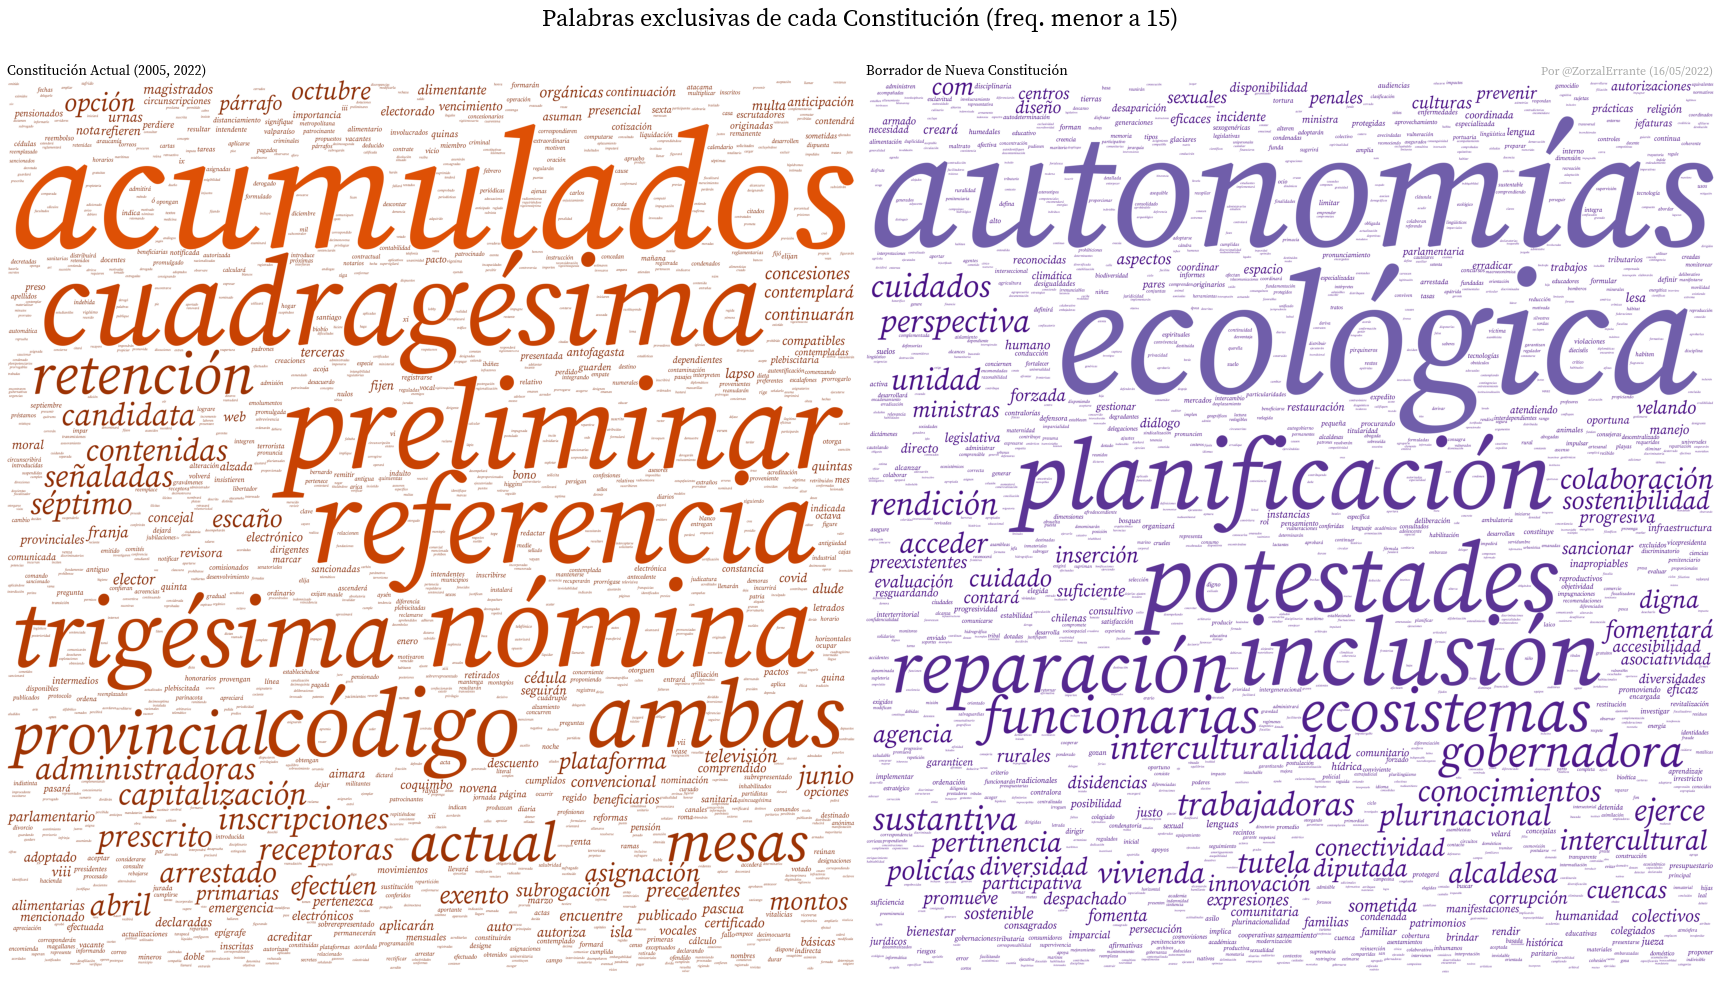

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(16 * 1.5, 9 * 1.5))
axes = axes.flatten()

axes[0].set_title(
    "Constitución Actual (2005, 2022)",
    loc="left",
    fontname="Source Serif Pro",
    fontsize=14,
)
axes[1].set_title(
    "Borrador de Nueva Constitución",
    loc="left",
    fontname="Source Serif Pro",
    fontsize=14,
)

axes[1].set_title(
    "Por @ZorzalErrante (16/05/2022)",
    loc="right",
    fontname="Source Serif Pro",
    fontsize=12,
    color="#abacab",
)
axes[0].set_axis_off()
axes[1].set_axis_off()

fig.suptitle(
    "Palabras exclusivas de cada Constitución (freq. menor a 15)",
    fontname="Source Serif Pro",
    fontsize=24,
    y=1.01
)

fig.tight_layout()

draw_wordcloud(
    axes[0],
    non_freq_words[non_freq_words["freq_next"] == 0]["freq_prev"].to_dict(),
    fontname=FontProperties(family="Source Serif Pro", style="italic"),
    cmap="Oranges_r",
    max_words=1500,
    relative_scaling=0.4,
)
draw_wordcloud(
    axes[1],
    non_freq_words[non_freq_words["freq_prev"] == 0]["freq_next"].to_dict(),
    fontname=FontProperties(family="Source Serif Pro", style="italic"),
    cmap="Purples_r",
    max_words=1500,
    relative_scaling=0.4,
)

fig.set_facecolor("white")
fig.savefig("word_cloud_constitucional.png", dpi=150, bbox_inches="tight")


In [29]:
import gensim

model = gensim.models.KeyedVectors.load_word2vec_format('../data/external/wiki2vec/eswiki_20180420_100d.txt.bz2')

In [30]:
model.most_similar('chile')

[('ENTITY/Chile', 0.8502610921859741),
 ('valparaíso', 0.8066999316215515),
 ('antofagasta', 0.7990609407424927),
 ('chilena', 0.7976288795471191),
 ('coquimbo', 0.7825356721878052),
 ('chileno', 0.7773566842079163),
 ('talca', 0.767042338848114),
 ('araucanía', 0.7640746235847473),
 ('rancagua', 0.7529497742652893),
 ('iquique', 0.7525542974472046)]

In [31]:
model.get_vector('chile')

array([ 0.1436, -0.2465, -0.3335, -0.4171, -0.2544, -0.3246, -0.1454,
        0.0281, -0.0617,  0.1808,  0.3072, -0.5933,  0.4314, -0.2131,
        0.4766,  0.2478,  0.2603,  0.5174,  0.1039,  0.2763, -0.6336,
       -0.0696, -0.2748, -0.5867,  0.6484, -0.0785, -0.2718,  0.4528,
       -0.6207,  0.1959, -0.2633,  0.4813,  0.1813, -0.0073, -0.0147,
        0.5087, -0.2539, -0.1554, -0.1372,  0.0139, -0.1952,  0.412 ,
       -0.3801,  0.1427, -0.1674,  0.5801, -0.2658, -0.3993, -0.2066,
       -0.3412, -0.2769, -0.0031, -0.0399, -0.0636,  0.3501,  0.2773,
       -0.7714,  1.0156, -0.0676,  0.3749, -0.6576,  0.3808,  0.8731,
        0.0939,  0.3786,  0.1396,  0.1168, -0.2636,  0.012 ,  0.0438,
       -0.79  , -0.2426,  0.6266,  0.8845,  0.6396, -0.3245, -0.2893,
        0.0421, -0.227 ,  0.024 ,  0.4578, -0.379 , -0.0282, -0.3968,
        0.2179,  0.2131, -0.0389, -0.4215,  0.0878,  0.502 ,  0.1376,
        0.7994,  0.3884, -0.8481,  0.3512,  0.8888,  0.5085, -0.1201,
       -0.3084, -0.0

In [43]:
model.has_index_for('chile'), model.has_index_for('chuchunco_city')

(True, False)

In [45]:
valid_words = freq_table.index.map(model.has_index_for)
valid_words.value_counts()


True     5600
False      98
Name: word, dtype: int64

In [42]:
freq_table[valid_words]

freq_prev  freq_next  tendency     n
word                                                
abandono         0.333333   0.666667  0.333333   3.0
abarca           0.000000   1.000000  1.000000   1.0
abastecimiento   0.333333   0.666667  0.333333   3.0
abierta          0.250000   0.750000  0.500000   4.0
abierto          0.200000   0.800000  0.600000   5.0
...                   ...        ...       ...   ...
óptima           0.000000   1.000000  1.000000   1.0
óptimas          0.000000   1.000000  1.000000   1.0
órdenes          0.571429   0.428571 -0.142857  14.0
órgano           0.222222   0.777778  0.555556  45.0
órganos          0.214286   0.785714  0.571429  84.0

[5600 rows x 4 columns]

In [49]:
embeddings = pd.DataFrame.from_records(
    freq_table[valid_words].index.map(model.get_vector)
).set_index(freq_table[valid_words].index)

embeddings


0       1       2       3       4       5       6   \
word                                                                     
abandono       -0.1178  0.0905 -0.5594 -0.1855  0.0438  0.2569  0.3659   
abarca          0.3299 -0.6463 -0.1326 -0.2364  0.0906 -0.1556 -0.5167   
abastecimiento  0.3914  0.7204 -0.6734 -0.1784  0.5649  0.1756 -0.1784   
abierta         0.3247  0.0876 -0.7572 -0.2206  0.1143  0.1029  0.1914   
abierto         0.2368  0.0957 -0.5540 -0.2490  0.0337  0.4345  0.0189   
...                ...     ...     ...     ...     ...     ...     ...   
óptima          0.4646  0.0356 -0.2540 -0.1818 -0.2263  0.8072 -0.4548   
óptimas         0.4465  0.0604 -0.2311  0.0330 -0.6169  0.4145 -0.6923   
órdenes        -0.0274 -0.1518 -0.5776 -0.3340 -0.2739  0.5394  0.1278   
órgano         -0.0938 -0.4917 -0.8911  0.3062 -0.2772  0.4998 -0.1390   
órganos        -0.2965 -0.6186 -0.5685 -0.4727 -0.2997  0.3353 -0.6530   

                    7       8       9   ...      90      91      92      93  \
word                                    ...                                   
abandono       -0.2335 -0.7201  0.2520  ... -0.0372 -0.1088 -0.2181 -0.2047   
abarca         -0.4275  0.2420 -0.1747  ...  0.2302  0.0048  0.1533  0.2527   
abastecimiento -0.2639 -0.2077  0.5285  ... -0.2344  0.0693  0.5086 -0.6077   
abierta         0.0198 -0.3922  0.2568  ...  0.0374  0.0763  0.3162 -0.5868   
abierto        -0.1987 -0.5050  0.1414  ... -0.3048  0.0100 -0.3035 -0.5750   
...                ...     ...     ...  ...     ...     ...     ...     ...   
óptima          0.7882  0.0339  0.4103  ...  0.2855 -0.0162  0.7304  0.1467   
óptimas         0.2220 -0.5808 -0.2524  ...  0.2126 -0.1781  0.6990 -0.0555   
órdenes        -0.4205 -0.3511 -0.3625  ...  0.2619 -0.4078 -0.0055 -0.4590   
órgano          0.3885  0.4255  0.1178  ... -0.0975  0.0248  0.4266 -0.8205   
órganos         0.3674  0.2299 -0.3799  ...  0.6019  0.2795  0.2231 -0.8432   

                    94      95      96      97      98      99  
word                                                            
abandono        0.0679 -0.2379 -0.2406 -0.1114  0.2108  0.2743  
abarca         -0.3784  0.2137 -0.4750 -0.0530  0.0953 -0.2669  
abastecimiento -0.0567  0.0504  0.0124 -1.0293  0.0082  0.2459  
abierta         0.1495  0.6432 -0.3332 -0.2586 -0.0685  0.4234  
abierto        -0.1139  0.4476 -0.5198  0.0662  0.2457  0.1266  
...                ...     ...     ...     ...     ...     ...  
óptima          0.6259  0.5378  0.2508 -0.4523 -0.4930 -0.0381  
óptimas         0.5649  0.4910 -0.3133 -0.0585 -0.3241 -0.1218  
órdenes         0.2851 -0.3013  0.1110 -0.1925 -0.3016 -0.3334  
órgano         -0.1456  0.3581 -0.1341 -0.6567 -0.0501  0.4991  
órganos        -0.0006 -0.1091 -0.0890 -0.4162 -0.2914  0.3875  

[5600 rows x 100 columns]

In [52]:
from sklearn.decomposition import PCA

pca_embeddings = pd.DataFrame(PCA(n_components=2).fit_transform(embeddings), index=embeddings.index, columns=['x', 'y'])
pca_embeddings

x         y
word                              
abandono        0.068299 -0.595532
abarca         -0.697395 -0.742778
abastecimiento -0.126256  0.171737
abierta         0.113333 -0.941109
abierto         0.015556 -0.763096
...                  ...       ...
óptima         -1.452224  0.165468
óptimas        -1.385573  0.574774
órdenes         0.684073 -0.149812
órgano          0.318957 -0.481197
órganos        -0.074353  1.039237

[5600 rows x 2 columns]

/home/egraells/miniconda3/envs/aves/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:244: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


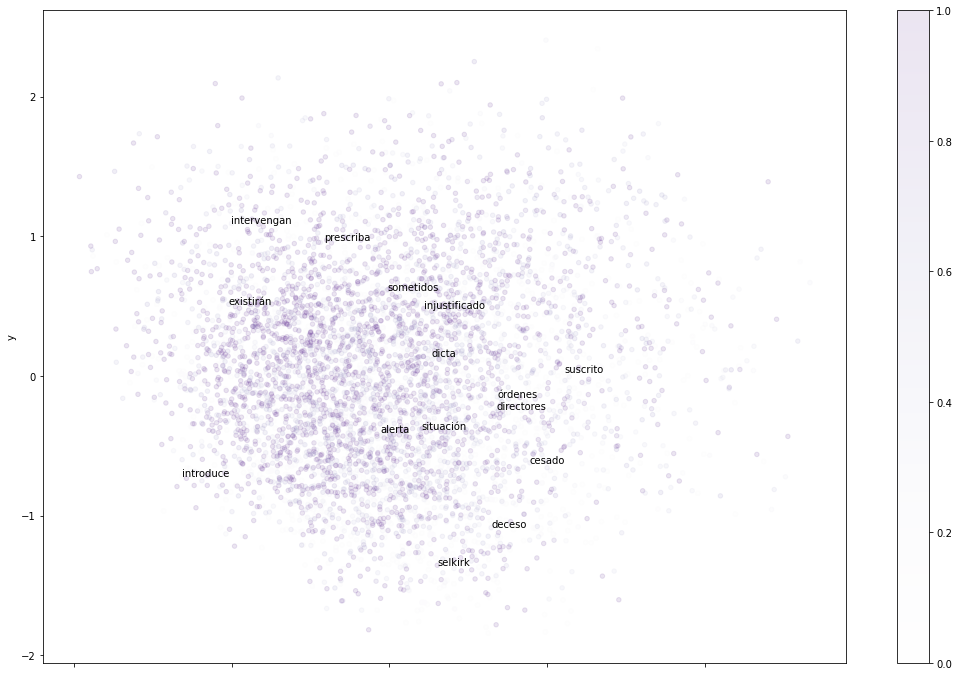

In [78]:
ax = pca_embeddings.plot(x='x', y='y', kind='scatter', figsize=(18, 12), color=freq_table[valid_words]['freq_next'], cmap='Purples', alpha=0.1)

for idx, row in pca_embeddings.sample(15).iterrows():
    ax.annotate(idx, row.values)


/home/egraells/miniconda3/envs/aves/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:244: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


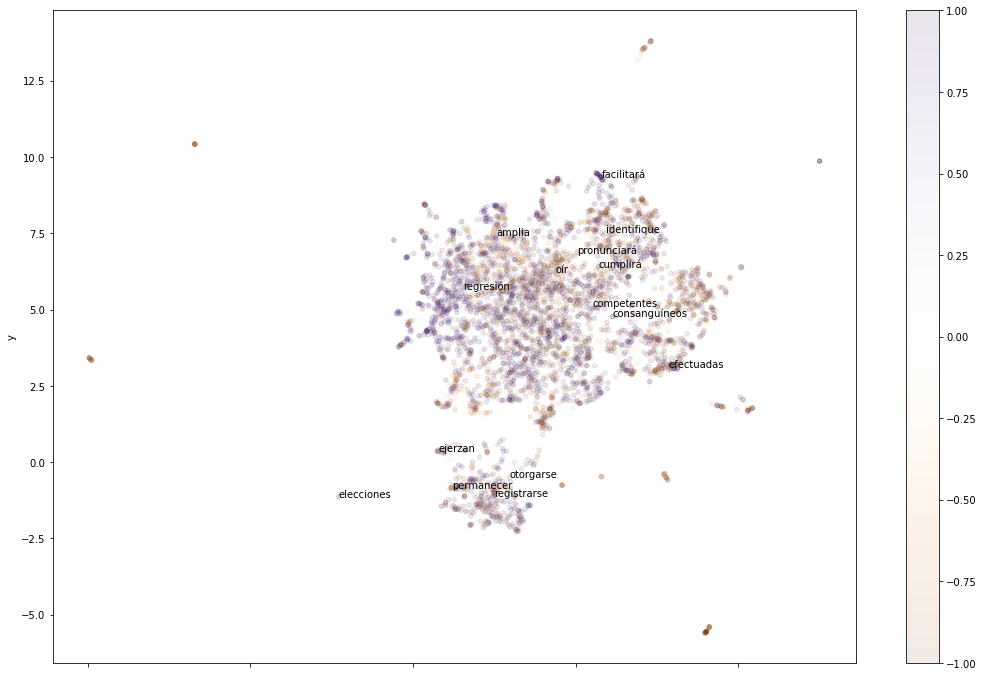

In [393]:
import umap

umap_embeddings = pd.DataFrame(
    umap.UMAP(
        n_components=2, n_neighbors=5, metric="euclidean", random_state=2022
    ).fit_transform(embeddings),
    index=embeddings.index,
    columns=["x", "y"],
)

ax = umap_embeddings.plot(
    x="x",
    y="y",
    kind="scatter",
    figsize=(18, 12),
    color=freq_table[valid_words]["tendency"],
    cmap="PuOr",
    alpha=0.1,
)

for idx, row in umap_embeddings.sample(15).iterrows():
    ax.annotate(idx, row.values)


In [408]:
import hdbscan

clusters = pd.Series(
    hdbscan.HDBSCAN(min_cluster_size=int(np.log(len(embeddings)))).fit_predict(
        umap_embeddings
    ),
    index=embeddings.index,
)
clusters.value_counts()


-1      2138
 123     231
 30      197
 88      151
 45       92
        ... 
 97        8
 70        8
 87        8
 118       8
 43        8
Length: 126, dtype: int64

In [409]:
clusters.value_counts() >= 50

-1       True
 123     True
 30      True
 88      True
 45      True
        ...  
 97     False
 70     False
 87     False
 118    False
 43     False
Length: 126, dtype: bool

In [410]:
cluster_counts = clusters.value_counts().drop(-1)
big_clusters = cluster_counts[cluster_counts >= 20].index
big_clusters

Int64Index([123,  30,  88,  45,  78, 106, 103,  95, 121,  44,  99,  64,  38,
             27, 104, 109,  92,  65,  32,  28,  19,  25, 105,  37, 110,  16,
            120, 114,  81,  23,  40,  80,  83,  39,  12,  90,  24,  15,   2,
             61,  34,  91,  29,  76,  73,  26,  60,  52,  31,   7,  98,  33,
             63,   8,  51,  85, 112,  66],
           dtype='int64')

In [411]:
clustered_embeddings = umap_embeddings.assign(cluster=clusters).pipe(
    lambda x: x[x["cluster"].isin(big_clusters)]
)
clustered_embeddings


x         y  cluster
word                                  
abiertos  12.198205  4.080135       38
abogados   7.439548  2.498263       65
abrir      6.167171 -0.837207       25
abrirse    6.174860 -0.834706       25
absoluta   7.669330  8.060196       95
...             ...       ...      ...
ñuble     15.425011  1.758235        7
ó          8.445741  5.664715      123
óptima     7.580138  8.386587       95
óptimas   11.339325  2.965149       27
órgano     8.763042  5.897809      123

[2580 rows x 3 columns]

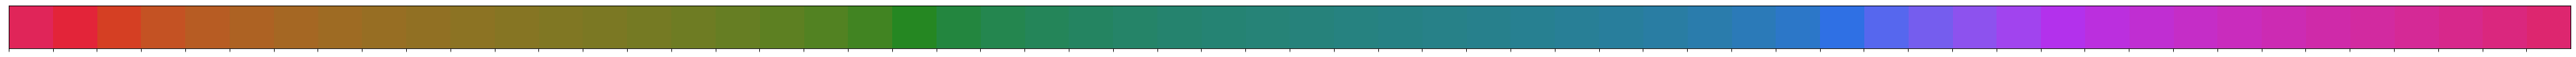

In [412]:
import seaborn as sns
cluster_colors = sns.husl_palette(n_colors=len(big_clusters), l=0.5)
sns.palplot(cluster_colors)

In [413]:
import alphashape
from descartes import PolygonPatch

/home/egraells/miniconda3/envs/aves/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


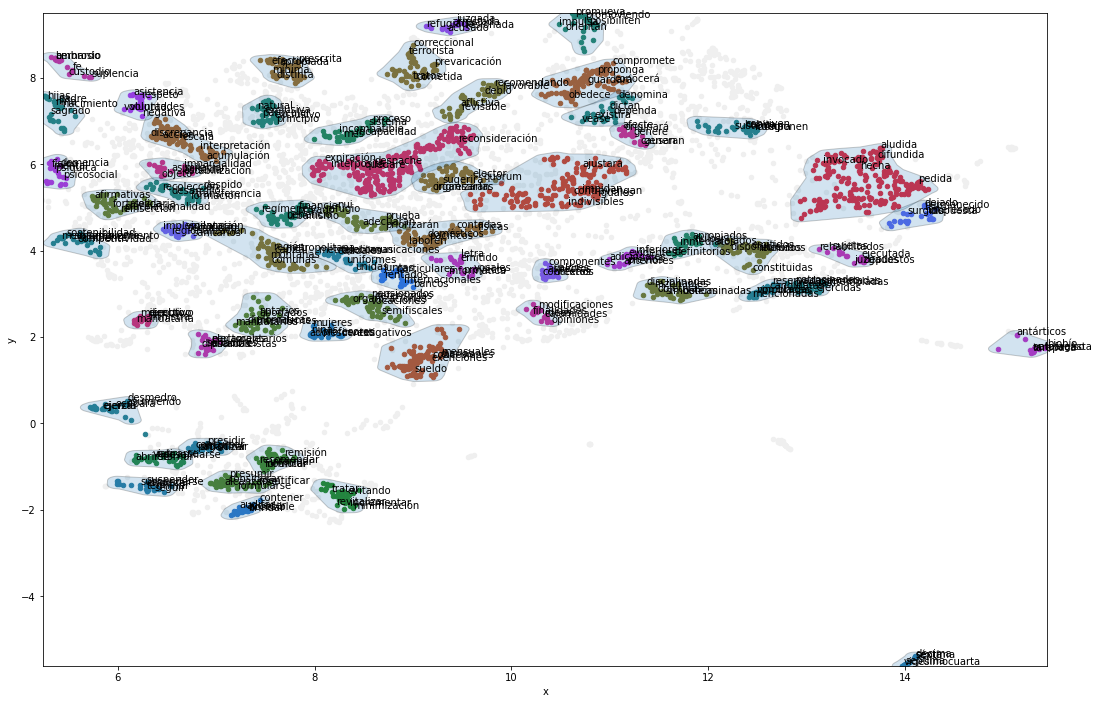

In [414]:
ax = umap_embeddings.plot(x='x', y='y', kind='scatter', figsize=(18, 12), color='#efefef')
ax.set_xlim(clustered_embeddings['x'].min(), clustered_embeddings['x'].max())
ax.set_ylim(clustered_embeddings['y'].min(), clustered_embeddings['y'].max())

for c_id, color in zip(big_clusters, cluster_colors):
    clustered = umap_embeddings.loc[clusters == c_id]
    #if clustered.empty or len(clustered) < 50:
    #    continue
    clustered.plot(x='x', y='y', kind='scatter', color=color, ax=ax)
    alpha_shape = alphashape.alphashape(clustered.values, 2.).buffer(0.1)
    ax.add_patch(PolygonPatch(alpha_shape, alpha=0.2))
    for idx, row in clustered.sample(5).iterrows():
        ax.annotate(idx, row.values)

    #break



In [415]:
cluster_freqs = (
    freq_table.join(clusters.rename("cluster"), how="inner")
    .groupby("cluster")[["freq_prev", "freq_next"]]
    .sum()
    .pipe(normalize_rows)
    .assign(tendency=lambda x: x['freq_next'] - x['freq_prev'])
)

cluster_freqs


freq_prev  freq_next  tendency
cluster                                
-1        0.448938   0.551062  0.102125
 0        0.983333   0.016667 -0.966667
 1        0.945714   0.054286 -0.891429
 2        0.963675   0.036325 -0.927350
 3        0.743317   0.256683 -0.486634
...            ...        ...       ...
 120      0.387291   0.612709  0.225419
 121      0.526984   0.473016 -0.053968
 122      0.407692   0.592308  0.184615
 123      0.533379   0.466621 -0.066758
 124      0.262357   0.737643  0.475286

[126 rows x 3 columns]

In [416]:
cluster_freqs

freq_prev  freq_next  tendency
cluster                                
-1        0.448938   0.551062  0.102125
 0        0.983333   0.016667 -0.966667
 1        0.945714   0.054286 -0.891429
 2        0.963675   0.036325 -0.927350
 3        0.743317   0.256683 -0.486634
...            ...        ...       ...
 120      0.387291   0.612709  0.225419
 121      0.526984   0.473016 -0.053968
 122      0.407692   0.592308  0.184615
 123      0.533379   0.466621 -0.066758
 124      0.262357   0.737643  0.475286

[126 rows x 3 columns]

In [417]:
cluster_freqs['tendency'].describe()

count    126.000000
mean       0.105461
std        0.370815
min       -0.966667
25%       -0.103710
50%        0.098697
75%        0.370134
max        1.000000
Name: tendency, dtype: float64

In [418]:
cluster_freqs['bin'] = pd.cut(cluster_freqs['tendency'], bins=[-1, -0.1, 0.1, 1], labels=False)
cluster_freqs['bin']

cluster
-1      2
 0      0
 1      0
 2      0
 3      0
       ..
 120    2
 121    1
 122    2
 123    1
 124    2
Name: bin, Length: 126, dtype: int64

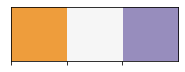

In [419]:
bin_colors = sns.color_palette('PuOr', n_colors=3)
sns.palplot(bin_colors)

In [420]:
import matplotlib.patheffects as path_effects
from aves.visualization.collections.labels import LabelCollection
from aves.visualization.colors import categorical_color_legend
import matplotlib.font_manager as font_manager

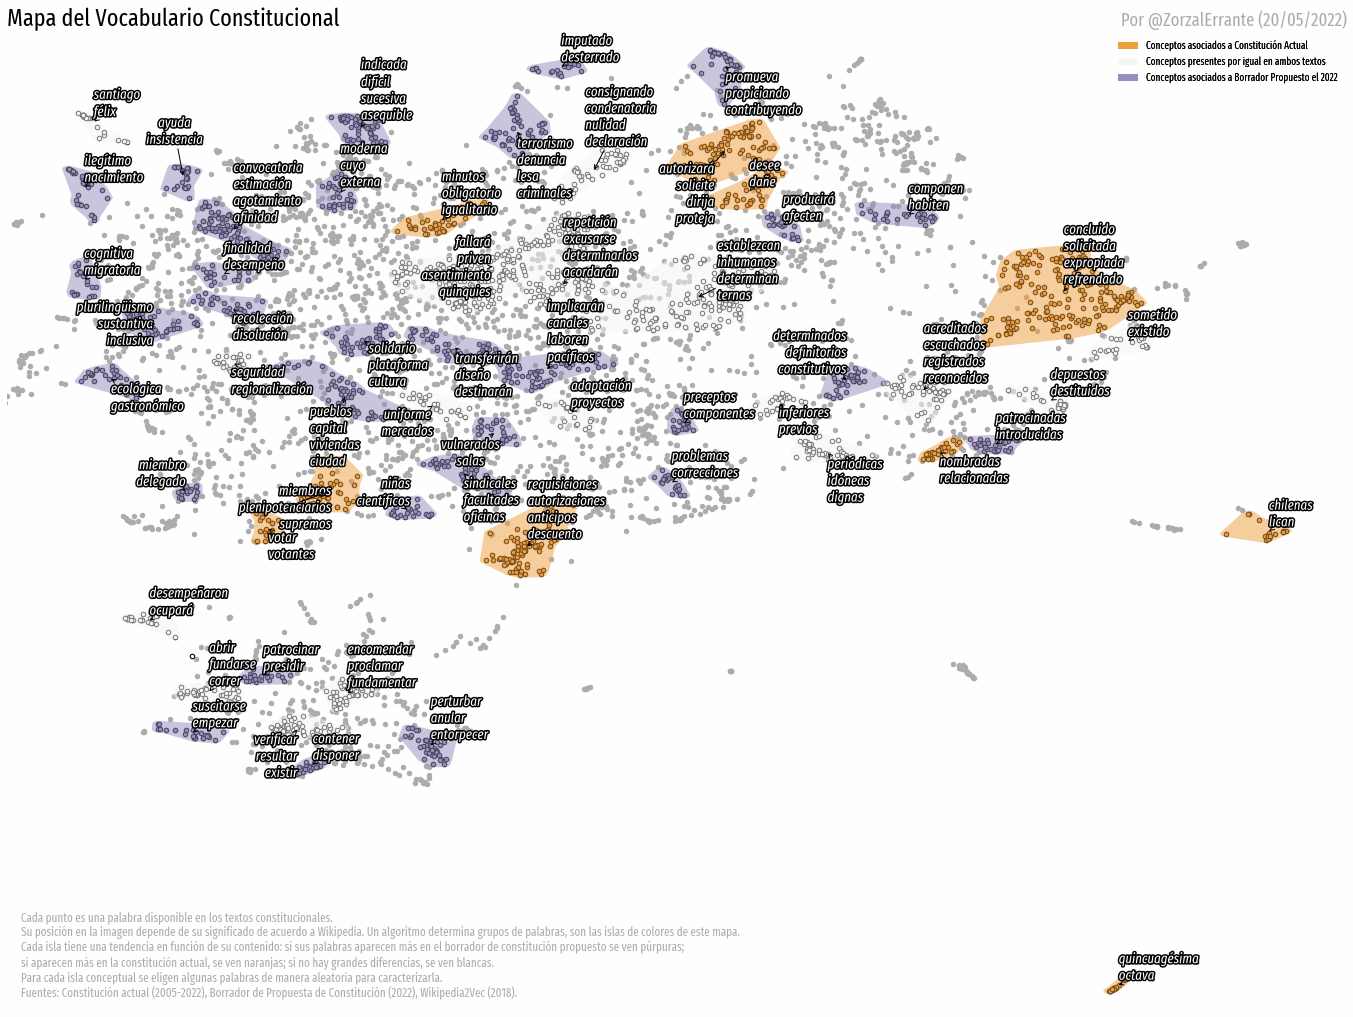

In [423]:
fig, ax = plt.subplots(figsize=(24, 18))

delta_x = 0.05 * (clustered_embeddings["x"].max() - clustered_embeddings["x"].min())
delta_y = 0.02 * (clustered_embeddings["y"].max() - clustered_embeddings["y"].min())

umap_embeddings.plot(
    x="x", y="y", kind="scatter", color="#abacab", ax=ax
)
ax.set_xlim(
    clustered_embeddings["x"].min() - delta_x, clustered_embeddings["x"].max() + delta_x
)
ax.set_ylim(
    clustered_embeddings["y"].min() - delta_y, clustered_embeddings["y"].max() + delta_y
)
ax.set_axis_off()
fig.set_facecolor('#fefefe')
ax.set_title('Mapa del Vocabulario Constitucional', fontname="Fira Sans Extra Condensed", fontsize=24, loc='left')
ax.set_title('Por @ZorzalErrante (20/05/2022)', fontname="Fira Sans Extra Condensed", fontsize=18, loc='right', color='#abacab')

collection = LabelCollection()

for c_id, color in zip(big_clusters, cluster_colors):
    clustered = umap_embeddings.loc[clusters == c_id]
    
    alpha_shape = alphashape.alphashape(clustered.values, 2.0).buffer(0.05)
    ax.add_patch(
        PolygonPatch(
            alpha_shape,
            alpha=0.5,
            facecolor=bin_colors[int(cluster_freqs.loc[c_id]["bin"])],
            edgecolor="none",
        )
    )

    clustered.plot(x="x", y="y", kind="scatter", color=bin_colors[int(cluster_freqs.loc[c_id]["bin"])], edgecolor='black', ax=ax)

    centroid = clustered.mean().values

    cluster_words = clustered.sample(frac=0.075).index.values
    cluster_words = cluster_words[: min(4, len(cluster_words))]
    collection.add_text("\n".join(cluster_words), centroid[0], centroid[1])

    # break

ax.annotate('''
Cada punto es una palabra disponible en los textos constitucionales.
Su posición en la imagen depende de su significado de acuerdo a Wikipedia. Un algoritmo determina grupos de palabras, son las islas de colores de este mapa.
Cada isla tiene una tendencia en función de su contenido: si sus palabras aparecen más en el borrador de constitución propuesto se ven púrpuras;
si aparecen más en la constitución actual, se ven naranjas; si no hay grandes diferencias, se ven blancas.
Para cada isla conceptual se eligen algunas palabras de manera aleatoria para caracterizarla.
Fuentes: Constitución actual (2005-2022), Borrador de Propuesta de Constitución (2022), Wikipedia2Vec (2018).
'''.strip(), (0.01, 0.01), xycoords='axes fraction', ha='left', va='bottom', fontname='Fira Sans Extra Condensed', fontsize=12, color='#abacab')

# fig.tight_layout()

collection.render(
    ax,
    avoid_collisions=True,
    color="white",
    fontsize=14,
    fontname="Fira Sans Extra Condensed",
    fontstyle='italic',
    outline_args={"linewidth": 3, "foreground": "black"},
    adjustment_args={"lim": 100, "arrowprops": dict(arrowstyle="->", color="black", lw=1)},
    outline=True,
)


font = font_manager.FontProperties(family='Fira Sans Extra Condensed',
                                   weight='normal',
                                   style='normal', size=10)

categorical_color_legend(ax, bin_colors, labels=['Conceptos asociados a Constitución Actual', 'Conceptos presentes por igual en ambos textos', 'Conceptos asociados a Borrador Propuesto el 2022'], loc='upper right', prop=font)

fig.savefig('conceptual_map.png', dpi=150, bbox_inches='tight')
